#### Final Paper EDF 6938: Natural Langauge Processing

### What Is Interesting and Relevant About Cybersecurity - NLP Analysis of a Survey of CS Students 
> #### Author: Cheryl Resch
> #### Date: December, 2022
> #### Email: cheryl.resch@ufl.edu


#### 1. Introduction 

Software vulnerabilities in commercial products are an issue of national security, financial and economic stability, and consumer confidence.  Data breaches caused by these vulnerabilities can lead to interruptions in public services, monetary loss, and loss of privacy.  Despite increased tracking and abatement of software vulnerabilities, Gueye and Mell [1] report that the most prevalent software errors have not changed much since vulnerabilities were first catalogued.   Software vulnerabilities can be reduced or eliminated when developers use principles of secure programming.   It is vital that future developers are taught principles of cybersecurity and secure programming.  The Association for Computing Machinery (ACM) includes the Information Assurance and Security knowledge area in its Computer Science curriculum, with topics of Foundational Concepts, Principles of Secure Design, and Defensive Programming.  When determining how to distribute security topics in the Computer Science curriculum, it would be useful to have a sense of students’ knowledge of and attitudes toward cybersecurity when they enter the curriculum, and how it changes as they progress through the curriculum.  This work explores the analysis written survey responses to explore what topics students find interesting and relevant about cyberseucurity.




#### 2. Related Work 

Natural language processing (NLP) has been used to gather insight on large corpa relating to cybersecurity, and student responses to reflection prompts.  In the cybersecurity domain, NLP has been used to mine Twitter and vulnerability reports in order to quickly gain insight on important cybersecurity related events. Georgescu [2] describes using NLP for the development of a cybersecurity vocabulary.  The author developed categories such as attacker, vulnerability, and software, and classified words in cybersecurity texts according to their category.  Roy et al. [3] use Word2Vec with continuous bag of words (CBOW) and skip-grams to develop document embeddings for descriptions of malware.  They developed categories such as vendor, operating system, and vulnerabilities.  Gasmi et al. [4] use a Long Short-Term Memory (LSTM) neural network to perform named entity recognition (NER) and relation extraction (ER) for documents from the National Vulnerability Database (NVD).  They found that the model was able to accurately identify the types and relations between entities such as vendors, applications, and operating systems. These works provide insight into categorizing of cybersecurity words. The words used by students will not be at the level of detail described in [2],[3] and [4]; students will use general words to describe cybersecurity.  But the categories developed provide insight as we study cybersecurity topics in student responses.

Now we review work done in analyzing short student reflections using NLP.  DeLin et al. [5] compare the use of Latent Dirichlet Allocation (LDA), Gibbs Sampling Dirichlet Mixture Model (GSDMM) and Word2Vec clustering for finding topics in responses to reflection prompts asking students to identify the most challenging topics in a course. They found that Word2Vec embeddings and K-means clustering performed the best at matching the ground truth human labeling of reflections with topics.  Dorodchi et al. [6] explore the use of clustering and sorting of student reflections in a Software Engineering class. Similar to [5], the reflections are intended to provide insight to instructors on what students are finding challenging in the class.  They used RoBERTa to generate sentence embeddings and K-means clustering to find clusters.  They found that sorting the reflections by clusters helped instructors more quickly gain insight into what students needed help with.  

This work expands this previous work to explore short student reflections on cybersecurity to extract topics.  We will use a strategy similar to that found in [5] and [6] to find the prevalence of cybersecurity topics in the student responses.  




#### 3. Research Question and Methods 
Students in four core Computer Science (CS) courses at the University of Florida were invited to participate in a survey conducted from 1-30 September 2022.  The survey contained multiple choice questions intended to measure students’ knowledge of cybersecurity.  The survey also included the following free response questions:

•	What is especially interesting to you about cybersecurity?

•	How is learning about cybersecurity relevant to your future?
1775 students provided informed consent and answered all the survey questions.  

The responses to these questions will be used to gain insight into prevalent topics that CS students find to be interesting or relevant regarding cybersecurity.  This work seeks to answer the following research question:

• Can sentence embedding and clustering identify prevalent topics in student responses to questions regarding their interest in cybersecurity?

The figure below shows the analysis process.

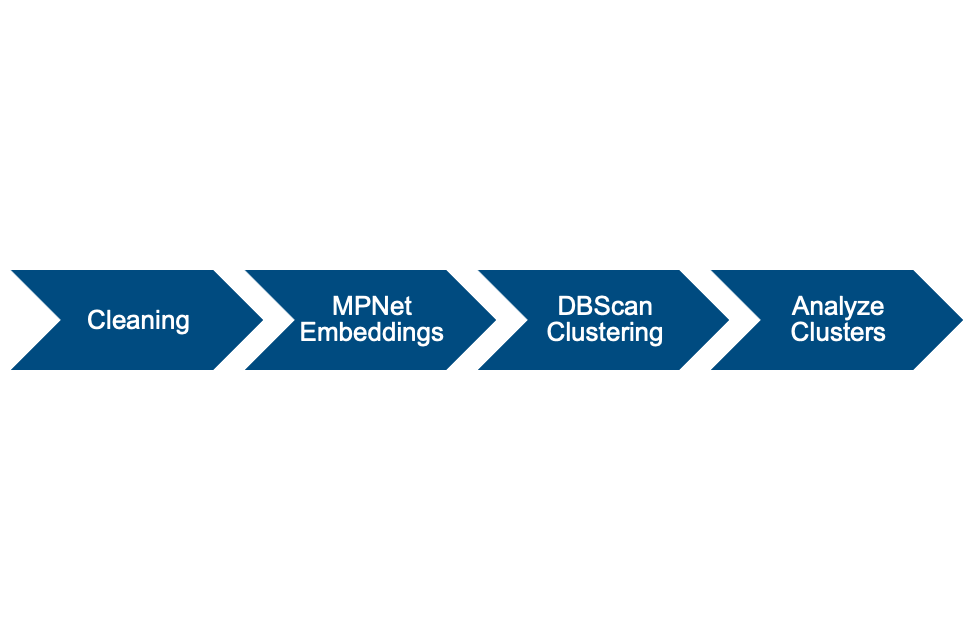

The survey responses were preprocessed as follows. Text was converted to all lower case, then abbreviated forms (e.g. I’ll) were be expanded to full words (e.g. I will).  


Next, embeddings were calculated for each response using MPNet[7] trained embeddings from Hugging Face[8].  MPNet combines the masking algorithm used by BERT with permutation and has been shown to more accurately capture sentence context than BERT[7].

The DBScan algorithm [9][10] was then used to create clusters.  The clusters of sentence embeddings are not expected to be of similar size or shape.  DBScan is density based,so this algorithm is an appropriate choice for this data.  




#### 4. Analysis Demonstration 

##### 4.1. Dependencies 

In [ ]:
# Import all the library that is necessary for your analysis 
!pip install sentence_transformers
!pip install umap-learn
import numpy as np
import pandas as pd 
import umap
from sentence_transformers import SentenceTransformer
from functools import partial
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials
!pip install hdbscan
import hdbscan
import matplotlib.pyplot as plt
#############################################################

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 5.8 MB 61.3 MB/s 
     |████████████████████████████████| 1.3 MB 55.6 MB/s 
     |████████████████████████████████| 182 kB 67.3 MB/s 
     |████████████████████████████████| 7.6 MB 64.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=5669bb1f7863aecfb4bd16ad8134237fb548e502c2b5d184dd357ae55a253f5a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 25.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.

##### 4.2. Code

In [ ]:
#### Your code for the analysis will be provided here 
## Text clustering



dat = pd.read_excel('relevant_blob1.xlsx')

def cleaning(text):
    
    text = text.replace('\n', ' ')
    text = text.replace("It'\s", "It is")
    text = text.replace("it'\s", "it is")
    text = text.replace("it\'s", "it is")
    text = text.replace("n\'t", " not")
    text = text.replace("\'ll", " will")
    text = text.replace("\'m", " am") 
    text = text.replace("'\s'", " is")
    text = text.replace('.', '. ')
    text = text.replace('   ', ' ')
    text = text.replace(' ', ' ')
    text = text.strip()
    
    return text


#corpus = dat['Relevant'].apply(cleaning)
corpus = dat['Relevant']
corpus = corpus.dropna() 


corpus

####################################################



0      Being as I plan to major in CS  I am sure that...
1      Learning about cybersecurity would allow me to...
2      Learning about cybersecurity will be crucial i...
3      Learning cybersecurity may be important to any...
4      I am going into software engineering  and cybe...
                             ...                        
487    Being able to keep important things safe  espe...
488    If I end up working for a big company  cyberse...
489    Learning about cybersecurity can be relevant t...
490    Cybersecurity would allow me to help secure da...
491    Cybersecurity is extremely important for sever...
Name: Relevant, Length: 492, dtype: object

In [ ]:
model_path="all-mpnet-base-v2"
model = SentenceTransformer(model_path)
corpus_embeddings = model.encode(corpus.values)

def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='euclidean', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost



def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize, which incorporates constraints
    on the number of clusters we want to identify
    """
    
    clusters = generate_clusters(embeddings, 
                                 n_neighbors = params['n_neighbors'], 
                                 n_components = params['n_components'], 
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])
    
    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
    
    #15% penalty on the cost function if outside the desired range of groups
    if (label_count < label_lower) | (label_count > label_upper):
        penalty = 0.25 
    else:
        penalty = 0
    
    loss = cost + penalty
    
    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayseian search on hyperopt hyperparameter space to minimize objective function
    """
    
    trials = Trials()
    fmin_objective = partial(objective, embeddings=embeddings, label_lower=label_lower, label_upper=label_upper)
    best = fmin(fmin_objective, 
                space = space, 
                algo=tpe.suggest,
                max_evals=max_evals, 
                trials=trials)

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print ("label count: {trials.best_trial['result']['label_count']}")
    
    best_clusters = generate_clusters(embeddings, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])
    
    return best_params, best_clusters, trials

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
corpus_embeddings.shape

(492, 768)

In [ ]:
hspace = {
    "n_neighbors":hp.choice('n_neighbors', range(3, 20)), 
    "n_components": hp.choice('n_components', range(3, 20)), 
    "min_cluster_size": hp.choice('min_cluster_size', range(2,20)), 
    "random_state": 1
}

label_lower = 5
#was 10
label_upper = 15
#was 100
max_evals = 100
best_params, best_clusters, trials = bayesian_search(corpus_embeddings,
                                                    space=hspace,
                                                    label_lower=label_lower,
                                                    label_upper=label_upper,
                                                    max_evals=max_evals)

100%|██████████| 100/100 [03:42<00:00,  2.22s/it, best loss: 0.13821138211382114]
best:
{'min_cluster_size': 10, 'n_components': 12, 'n_neighbors': 3, 'random_state': 1}
label count: {trials.best_trial['result']['label_count']}


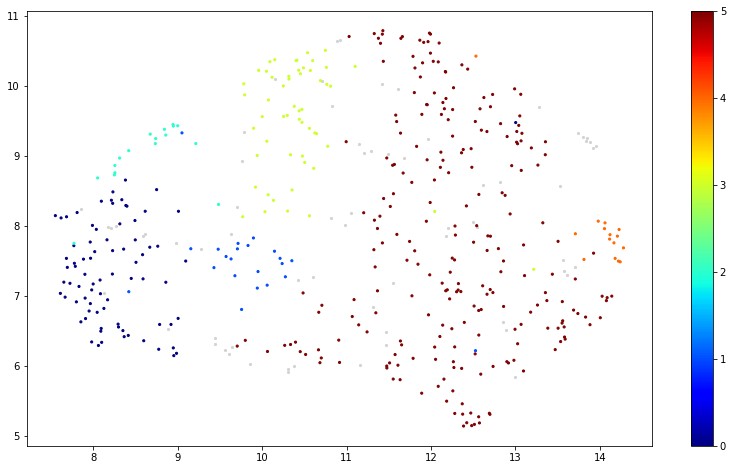

In [ ]:
def plot_clusters(embeddings, clusters, n_neighbors=13, min_dist=0.1):
    """
    Reduce dimensionality of best clusters and plot in 2D

    Arguments:
        embeddings: embeddings to use
        clusteres: HDBSCAN object of clusters
        n_neighbors: float, UMAP hyperparameter n_neighbors
        min_dist: float, UMAP hyperparameter min_dist for effective
                  minimum distance between embedded points

    """
    umap_data = umap.UMAP(n_neighbors=n_neighbors, 
                          n_components=2, 
                          min_dist = min_dist,  
                          #metric='cosine',
                          random_state=42).fit_transform(embeddings)

    point_size = 100.0 / np.sqrt(embeddings.shape[0])
    
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = clusters.labels_

    fig, ax = plt.subplots(figsize=(14, 8))
    outliers = result[result.labels == -1]
    clustered = result[result.labels != -1]
    plt.scatter(outliers.x, outliers.y, color = 'lightgrey', s=point_size)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')
    plt.colorbar()
    plt.show()
plot_clusters(corpus_embeddings, best_clusters)

In [ ]:
result = pd.DataFrame(corpus)
result['category'] =best_clusters.labels_
result[result.category==3]
with pd.ExcelWriter("cyber_relevant_separatetheblob1.xlsx") as writer:
   result.to_excel(writer)

####4. Results

4.1 How is Learning About Cybersecurity Relevant to Your Future

Table 4.1 shows the results from the clustering algorithm for this question. I read through the responses in each category to discern themes in that category.

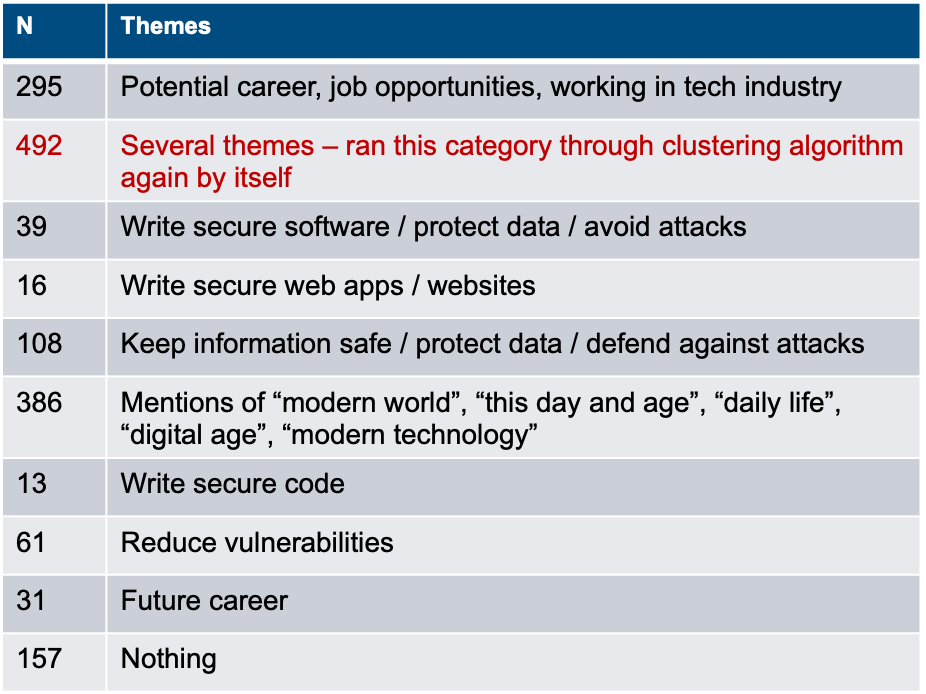

Table 4.1 - Themes in Responses to "Relevant" Question

It was difficult to discern a theme for the largest category. The clustering algorithm was run again on these responses only with a minimum number of categories set to five. Table 4.2 shows the results, where the split of the category run through the algorithm a second time is shown in red.


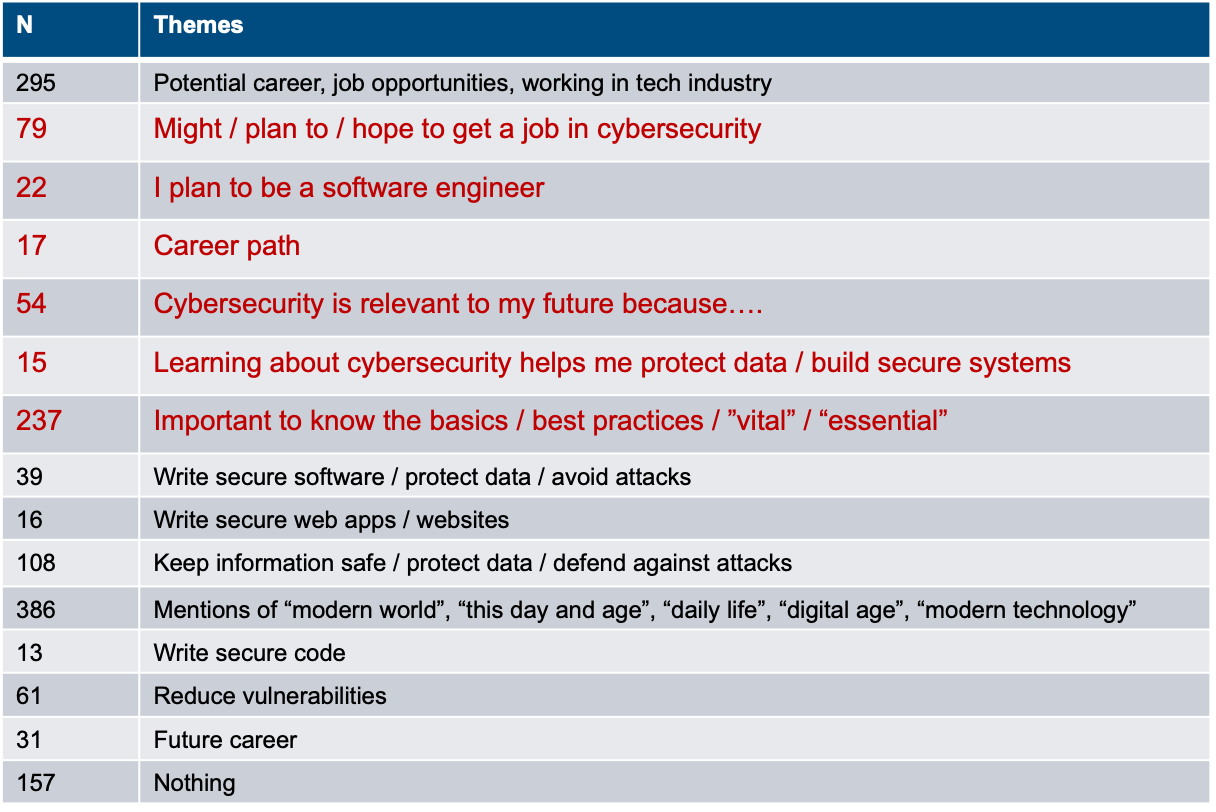
Figure 4.2 - Themes in Reponses to "Relevant" Question with Category Split


Splitting the large category uncovered more reponses that discussed a potential career, and another small category that discussed protecting data. There is another large category of responses with a general discussion of how learning about cybersecurity is "important" or "essential". The categories can be generalized into four themes:

* Career - 444 responses
* Security of code or data - 229 responses
* General answer - 677 responses
* Nothing - 157 responses

The most prevalent specific themes in the responses about the relevance of cybersecurity were about a potential career and the security of code or data. Our lessons stress the security of code and data, but these results indicate that it would be helpful to also stress the importance of learning about cybersecurity for use in students' future career. Any potential CS career will involve some cybersecurity, and some emphasis on this point may cause more students to see the relevance in learning about it.



4.2 What is Particularly Interesting to You About Cybersecurity

Table 4.3 shows the results from the clustering algorithm for the responses to this question.

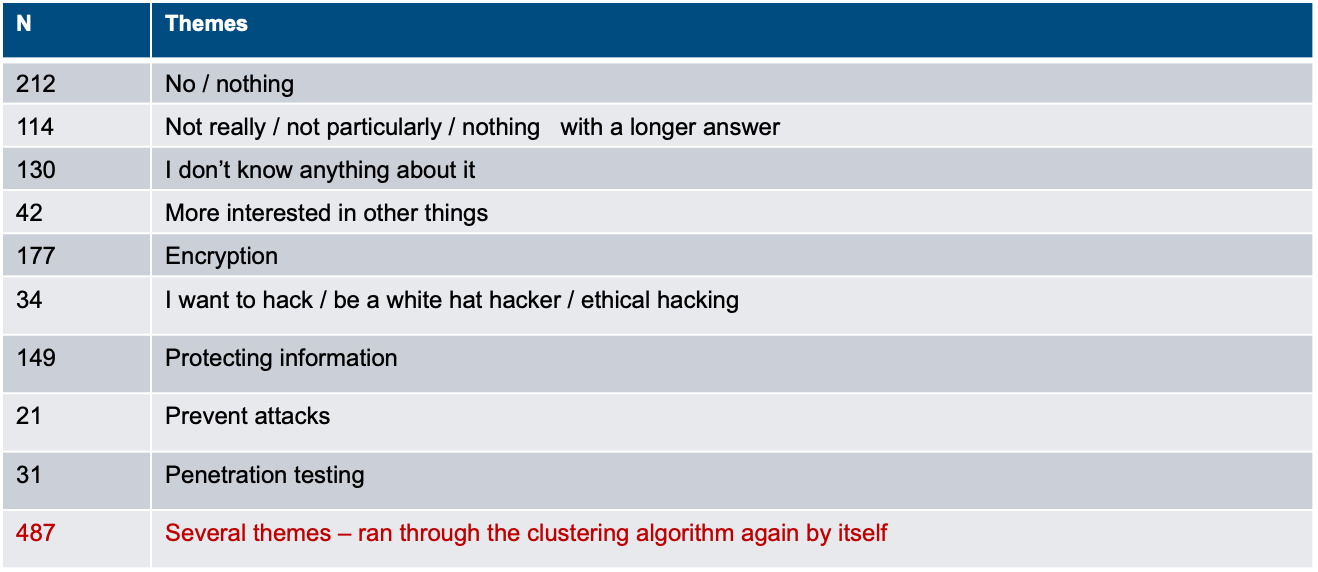
Table 4.3 - Results of "Interesting" Question

Encryption is a topic many students are interested in.  This may be a good topic to introduce early in the CS curriculum to pique more students' interest.  Another specific topic mentioned is ethical hacking and penetration testing, which are basically the same thing.  This is another topic that could be introduced to students to pique their interest in cybersecurity.  There a large category with several themes.  These resonses were run through the clustering algorithm again, with the parameter specifying the minimum number of categories set to five.  Table 4.4 shows the results.


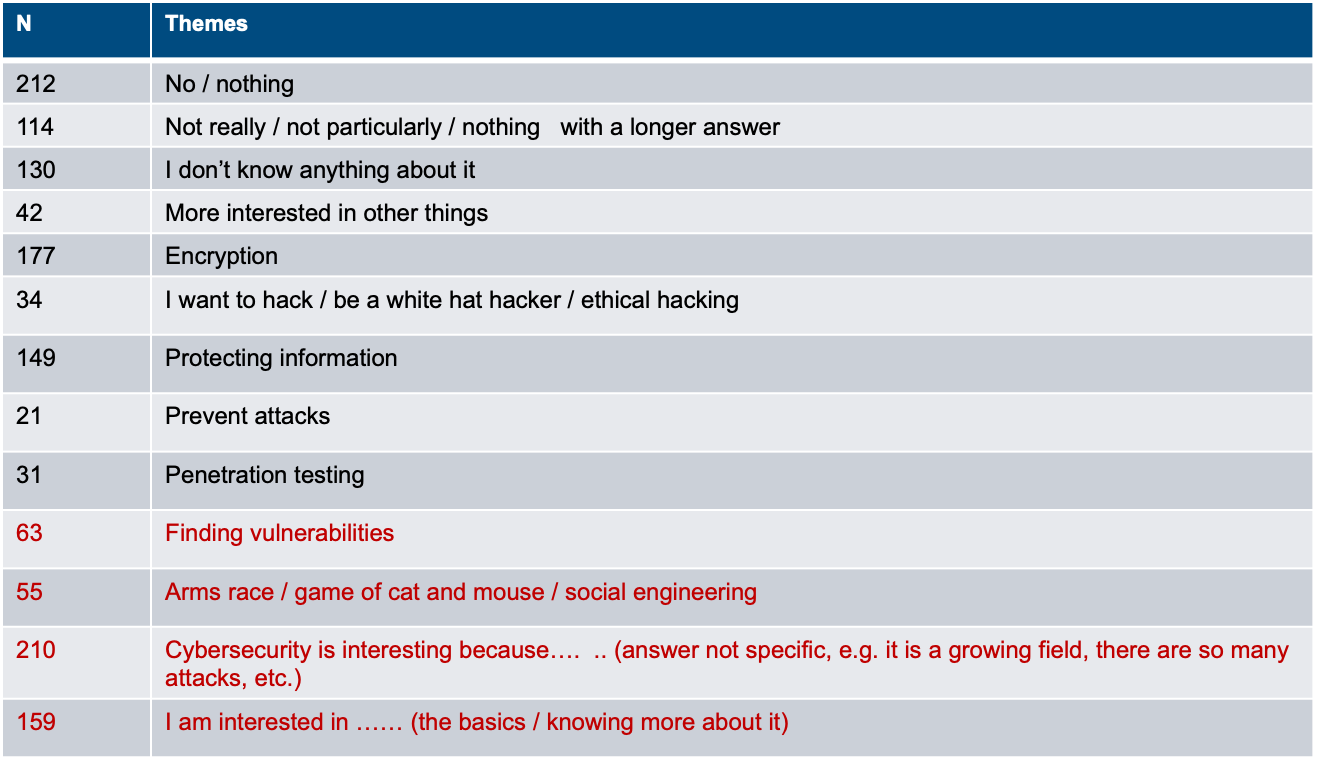
Table 4.4 - Results of "Interesting" Question with Large Category Split

Splitting the large cateogry uncovered another category with the topic of "finding vulnerabilities.  Another category was an interesting collection of colloquialisms describing the adversarial nature of cybersecurity.  Finally there were two large categories with no discernable unifying theme other than mentioning the word "interesting".  

These topics can be combined into the following overall themes:

*   Encryption - 177 responses
*   Finding vulnerabilities/penetration testing - 128 responses
*   Protecting information - 170 responses
*   Cybersecurity is interesting - 424 responses
*   Nothing - 368 responses
*   Don't know enough about it - 130 responses

These themes are enlightening.  As students progress through the curriculum and have more cybersecurity content in their courses, it is hoped that the fraction of responses in the last two themes will decrease.  The top two themes provide some indication of topics that may pique students' interest.  Coverage of encryption and penetration testing in early core CS courses may show students how cybersecurity can be interesting.





#### 5. Conclusion and Discussion
Sentence embeddings and clustering was successfully used to find the prevalent topics in student responses to questions about their attitudes toward cybersecurity.  For the question "How is learning about cybersecurity relevant to your future", we found that preparation for career, and securing code or data were prevalent topics.  For the question "What is particularly interesting to you about cybersecurity", we found that encryption, finding vulnerabilities, and protecting information were prevalent topics.  We will incorporate coverage of these topics into our cybersecurity lessons.  Hopefully as a result of this, the number of responses indicating that students find nothing relevant or interesting about cybersecurity will decrease.

There were large clusters of sentences that begin with a repeat of the question.  For example there was a large cluster of sentences that begin with a variation of "cybersecurity is interesting because".  Future work will entail researching how to clean the sentences so that the repeat of the question does not have as much affect on its classification.

[1] Gueye, A., & Mell, P. (2021). A Historical and Statistical Study of the Software Vulnerability Landscape. arXiv preprint arXiv:2102.01722.

[2]   Georgescu, T. M. (2020). Natural language processing model for automatic analysis of cybersecurity-related doc-uments. Symmetry, 12(3), 354.

[3] Roy, A., Park, Y., & Pan, S. (2017). Learning domain-specific word embeddings from sparse cybersecurity texts. arXiv preprint arXiv:1709.07470.

[4] Gasmi, H., Laval, J., & Bouras, A. (2019). Information extraction of cybersecurity concepts: an LSTM approach. Applied Sciences, 9(19), 3945.


[5] De Lin, O., Gottipati, S., Ling, L. S., & Shankararaman, V. (2021, October). Mining In-formal & Short Student Self-Reflections for De-tecting Challenging Topics–A Learning Outcomes Insight Dashboard. In 2021 IEEE Frontiers in Education Conference (FIE) (pp. 1-9). IEEE.

[6] Dorodchi, M., Benedict, A., Al-Hossami, E., Quinn, A., Wiktor, S., Benedict, A., & Fallahian, M. (2021). Clustering Students’ Short Text Re-flections: A Software Engineering Course Case Study.

[7] Song, K., Tan, X., Qin, T., Lu, J., & Liu, T. Y. (2020). Mpnet: Masked and permuted pre-training for language understanding. Advances in Neural Information Processing Systems, 33, 16857-16867.

[8] https://huggingface.co/

[9] Deng, D. (2020, September). DBSCAN clustering algorithm based on density. In 2020 7th International Forum on Electrical Engineering and Automation (IFEEA) (pp. 949-953). IEEE.

[10] Djouzi, K., & Beghdad-Bey, K. (2019, June). A review of clustering algorithms for big data. In 2019 International Conference on Networking and Advanced Systems (ICNAS) (pp. 1-6). IEEE.



